In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-deep')


# Import Data and Clean

In [2]:
df_results = pd.read_csv('../data/results.csv')

In [3]:
df_results.head(40)


resultId  raceId  driverId  constructorId number  grid position  \
0          1      18         1              1     22     1        1   
1          2      18         2              2      3     5        2   
2          3      18         3              3      7     7        3   
3          4      18         4              4      5    11        4   
4          5      18         5              1     23     3        5   
5          6      18         6              3      8    13        6   
6          7      18         7              5     14    17        7   
7          8      18         8              6      1    15        8   
8          9      18         9              2      4     2       \N   
9         10      18        10              7     12    18       \N   
10        11      18        11              8     18    19       \N   
11        12      18        12              4      6    20       \N   
12        13      18        13              6      2     4       \N   
13        14      18        14              9      9     8       \N   
14        15      18        15              7     11     6       \N   
15        16      18        16             10     20    22       \N   
16        17      18        17              9     10    14       \N   
17        18      18        18             11     16    12       \N   
18        19      18        19              8     19    21       \N   
19        20      18        20              5     15     9       \N   
20        21      18        21             10     21    16       \N   
21        22      18        22             11     17    10       \N   
22        23      19         8              6      1     2        1   
23        24      19         9              2      4     4        2   
24        25      19         5              1     23     8        3   
25        26      19        15              7     11     3        4   
26        27      19         1              1     22     9        5   
27        28      19         2              2      3     5        6   
28        29      19        17              9     10     6        7   
29        30      19         4              4      5     7        8   
30        31      19        14              9      9    12        9   
31        32      19        18             11     16    11       10   
32        33      19        12              4      6    13       11   
33        34      19        21             10     21    17       12   
34        35      19        22             11     17    14       13   
35        36      19         3              3      7    16       14   
36        37      19        19              8     19    21       15   
37        38      19        11              8     18    19       16   
38        39      19         6              3      8    22       17   
39        40      19        20              5     15    15       \N   

   positionText  positionOrder  points  laps         time milliseconds  \
0             1              1    10.0    58  1:34:50.616      5690616   
1             2              2     8.0    58       +5.478      5696094   
2             3              3     6.0    58       +8.163      5698779   
3             4              4     5.0    58      +17.181      5707797   
4             5              5     4.0    58      +18.014      5708630   
5             6              6     3.0    57           \N           \N   
6             7              7     2.0    55           \N           \N   
7             8              8     1.0    53           \N           \N   
8             R              9     0.0    47           \N           \N   
9             R             10     0.0    43           \N           \N   
10            R             11     0.0    32           \N           \N   
11            R             12     0.0    30           \N           \N   
12            R             13     0.0    29           \N           \N   
13            R             14     0.0    25           \

In [4]:
# Mask pit starts, return new table
mask_0 = df_results['grid'] == 0
df_results = df_results[~mask_0]
df_results

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
5             6      18         6              3      8    13        6   
6             7      18         7              5     14    17        7   
7             8      18         8              6      1    15        8   
8             9      18         9              2      4     2       \N   
9            10      18        10              7     12    18       \N   
10           11      18        11              8     18    19       \N   
11           12      18        12              4      6    20       \N   
12           13      18        13              6      2     4       \N   
13           14      18        14              9      9     8       \N   
14           15      18        15              7     11     6       \N   
15           16      18        16             10     20    22       \N   
16           17      18        17              9     10    14       \N   
17           18      18        18             11     16    12       \N   
18           19      18        19              8     19    21       \N   
19           20      18        20              5     15     9       \N   
20           21      18        21             10     21    16       \N   
21           22      18        22             11     17    10       \N   
22           23      19         8              6      1     2        1   
23           24      19         9              2      4     4        2   
24           25      19         5              1     23     8        3   
25           26      19        15              7     11     3        4   
26           27      19         1              1     22     9        5   
27           28      19         2              2      3     5        6   
28           29      19        17              9     10     6        7   
29           30      19         4              4      5     7        8   
...         ...     ...       ...            ...    ...   ...      ...   
24649     24655    1032       826            213     26    13       10   
24650     24656    1032         8             51      7    16       11   
24651     24657    1032       825            210     20    15       12   
24653     24659    1032       841             51     99    19       14   
24654     24660    1032       842            213     10     7       15   
24655     24661    1032       847              3     63    11       16   
24656     24662    1032       849              3      6    18       17   
24657     24663    1032       839              4     31     5       \N   
24658     24664    1032       844              6     16    14       \N   
24659     24665    1032        20              6      5    10       \N   
24660     24666    1033         1            131     44     1        1   
24661     24667    1033       830              9     33     7        2   
24662     24668    1033       822            131     77     2        3   
24663     24669    1033       840            211     18     3        4   
24664     24670    1033       848              9     23    13        5   
24665     24671    1033        20              6      5     5        6   
24666     24672    1033       815            211     11     4        7   
24667     24673    1033       817              4      3    11        8   
24668     24674    1033       832              1     55     9        9   
24669     24675    1033       825            210     20    16       10   
24670     24676    1033       844              6     16     6       11   
24671     24677    1033       826            213     26    17       12   
24672     2

In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 24679
Data columns (total 18 columns):
resultId           23100 non-null int64
raceId             23100 non-null int64
driverId           23100 non-null int64
constructorId      23100 non-null int64
number             23100 non-null object
grid               23100 non-null int64
position           23100 non-null object
positionText       23100 non-null object
positionOrder      23100 non-null int64
points             23100 non-null float64
laps               23100 non-null int64
time               23100 non-null object
milliseconds       23100 non-null object
fastestLap         23100 non-null object
rank               23100 non-null object
fastestLapTime     23100 non-null object
fastestLapSpeed    23100 non-null object
statusId           23100 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.3+ MB


## Separate pole position starts

In [6]:
# Mask for pole position only

mask_1 = df_results['grid'] == 1
df_top_grid = df_results[mask_1]
df_top_grid
# H0: Having the pole position does not increase your probability of winning the race or a podium finish
# Ha: Having the pole position does increase your probability of winning the race or a podium finish

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
40           41      19        13              6      2     1       \N   
46           47      20         9              2      4     1        3   
66           67      21         8              6      1     1        1   
88           89      22        13              6      2     1        1   
110         111      23        13              6      2     1        3   
146         147      24         1              1     22     1       \N   
149         150      25         8              6      1     1        2   
172         173      26         5              1     23     1        5   
188         189      27         1              1     22     1        1   
212         213      28         1              1     22     1        5   
228         229      29        13              6      2     1        1   
250         251      30         1              1     22     1        3   
268         269      31        20              5     15     1        1   
300         301      32        13              6      2     1       13   
319         320      33         1              1     22     1       12   
328         329      34         1              1     22     1        1   
348         349      35        13              6      2     1        1   
368         369      36         8              6      6     1        1   
394         395      37        13              6      5     1        5   
412         413      38        13              6      5     1        1   
434         435      39        13              6      5     1        1   
456         457      40         4              1      1     1        1   
478         479      41         1              1      2     1        1   
500         501      42         1              1      2     1        1   
523         524      43        13              6      5     1        2   
546         547      44         1              1      2     1        3   
579         580      45         8              6      6     1       \N   
588         589      46         1              1      2     1        1   
610         611      47        13              6      5     1        1   
...         ...     ...       ...            ...    ...   ...      ...   
24097     24103    1005         1            131     44     1        1   
24119     24125    1006         1            131     44     1        3   
24153     24159    1007       817              9      3     1       \N   
24157     24163    1008         1            131     44     1        1   
24177     24183    1009         1            131     44     1        1   
24198     24204    1010         1            131     44     1        2   
24219     24225    1011       844              6     16     1        3   
24238     24244    1012       822            131     77     1        2   
24257     24263    1013       822            131     77     1        1   
24278     24284    1014       822            131     77     1        2   
24298     24304     717       373            172      2     1       \N   
24300     24306    1015         1            131     44     1        1   
24321     24327    1016        20              6      5     1        2   
24340     24346    1017         1            131     44     1        1   
24361     24367    1018       844              6     16     1        2   
24381     24387    1019       822            131     77     1        2   
24408     24414    1020         1            131     44     1        9   
24421     24427    1021       830              9     33     1        2   
24440     24446    1022       844              6     16     1        1   
24460     24466    1023       844              6     16     1        1   
24481     24487    1024       844              6     16     1        2   
24502     24508    1025       844              6     16     1        3   
24521     2

In [81]:
finish_count = df_top_grid['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
finish_count = finish_count.sort_index(0)

In [84]:
finish_count.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31],
           dtype='int64')

## Plot scatter of pole position start finishes

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25725668>)

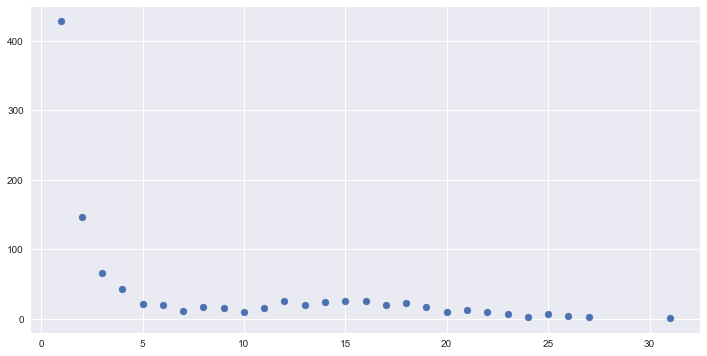

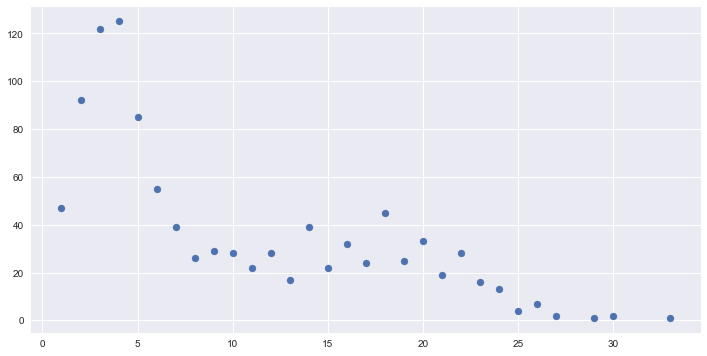

In [70]:
def plot_finishes_by_start(n):
    masker = df_results['grid'] == n
    masked_grid = df_results[masker]
    gridcount = masked_grid['positionOrder'].value_counts()
    gridcount = gridcount.sort_index(0)
    fig, ax = plt.subplots(figsize = (12,6))
    ax.scatter(gridcount.index, gridcount)
    return fig, ax

plot_finishes_by_start(1)
plot_finishes_by_start(5)

# ax.scatter(finish_count.index, finish_count)

In [10]:
df_not_top = df_results[~mask_1]
df_not_top

resultId  raceId  driverId  constructorId number  grid position  \
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
5             6      18         6              3      8    13        6   
6             7      18         7              5     14    17        7   
7             8      18         8              6      1    15        8   
8             9      18         9              2      4     2       \N   
9            10      18        10              7     12    18       \N   
10           11      18        11              8     18    19       \N   
11           12      18        12              4      6    20       \N   
12           13      18        13              6      2     4       \N   
13           14      18        14              9      9     8       \N   
14           15      18        15              7     11     6       \N   
15           16      18        16             10     20    22       \N   
16           17      18        17              9     10    14       \N   
17           18      18        18             11     16    12       \N   
18           19      18        19              8     19    21       \N   
19           20      18        20              5     15     9       \N   
20           21      18        21             10     21    16       \N   
21           22      18        22             11     17    10       \N   
22           23      19         8              6      1     2        1   
23           24      19         9              2      4     4        2   
24           25      19         5              1     23     8        3   
25           26      19        15              7     11     3        4   
26           27      19         1              1     22     9        5   
27           28      19         2              2      3     5        6   
28           29      19        17              9     10     6        7   
29           30      19         4              4      5     7        8   
30           31      19        14              9      9    12        9   
...         ...     ...       ...            ...    ...   ...      ...   
24648     24654    1032       832              1     55     3        9   
24649     24655    1032       826            213     26    13       10   
24650     24656    1032         8             51      7    16       11   
24651     24657    1032       825            210     20    15       12   
24653     24659    1032       841             51     99    19       14   
24654     24660    1032       842            213     10     7       15   
24655     24661    1032       847              3     63    11       16   
24656     24662    1032       849              3      6    18       17   
24657     24663    1032       839              4     31     5       \N   
24658     24664    1032       844              6     16    14       \N   
24659     24665    1032        20              6      5    10       \N   
24661     24667    1033       830              9     33     7        2   
24662     24668    1033       822            131     77     2        3   
24663     24669    1033       840            211     18     3        4   
24664     24670    1033       848              9     23    13        5   
24665     24671    1033        20              6      5     5        6   
24666     24672    1033       815            211     11     4        7   
24667     24673    1033       817              4      3    11        8   
24668     24674    1033       832              1     55     9        9   
24669     24675    1033       825            210     20    16       10   
24670     24676    1033       844              6     16     6       11   
24671     24677    1033       826            213     26    17       12   
24672     2

In [11]:
not_pole_finish_count = df_not_top['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
not_pole_finish_count = not_pole_finish_count.sort_index(0)
not_pole_finish_count

1      596
2      883
3      965
4      988
5     1006
6     1009
7     1017
8     1011
9     1012
10    1012
11    1013
12    1000
13    1000
14     992
15     987
16     971
17     953
18     934
19     921
20     903
21     684
22     650
23     452
24     432
25     288
26     237
27      39
28      26
29      22
30      21
31      17
32      14
33      12
34       1
Name: positionOrder, dtype: int64

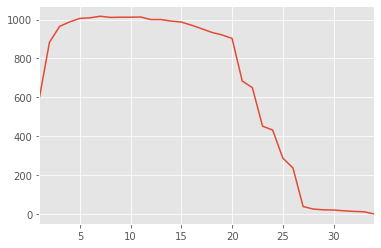

In [12]:
fig, ax = plt.subplots()
not_pole_finish_count.plot()

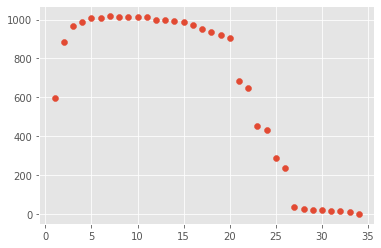

In [13]:
fig, ax = plt.subplots()
ax.scatter(not_pole_finish_count.index, not_pole_finish_count)

In [14]:
def cdf(value, array):
    return (array<value).sum()/len(array)

vcdf = np.vectorize(cdf, excluded = ['array'])



In [98]:
cdf1 = vcdf(value = finish_count.index, array = finish_count)
cdf2 = vcdf(value = grid_2.index, array = grid_2)
cdf3 = vcdf(value = grid_3.index, array = grid_3)

# x axis needs to be finish position, instead of finish count

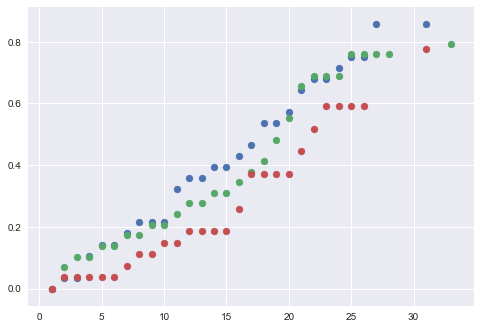

In [99]:
plt.scatter(finish_count.index, cdf1)
plt.scatter(grid_2.index, cdf2)
plt.scatter(grid_3.index, cdf3)

AttributeError: 'PathCollection' object has no property 'kind'

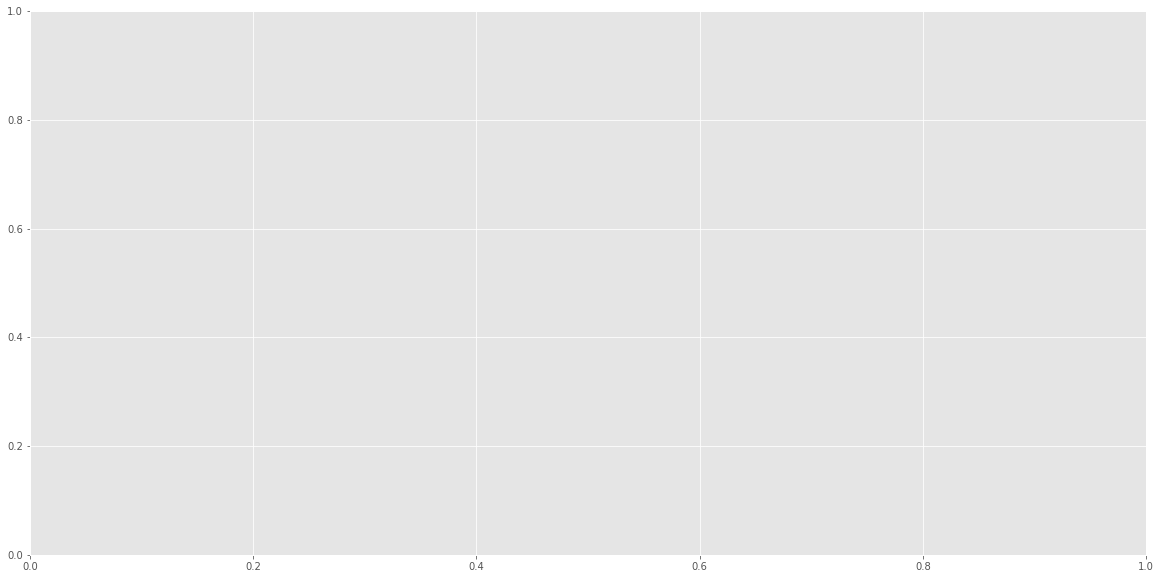

In [19]:

#starting positon vs fininishing
#drop pit starts

In [20]:
finish_count[:20], not_pole_finish_count[:20]

(1     428
 2     147
 3      66
 4      43
 5      21
 6      19
 7      11
 8      17
 9      15
 10     10
 11     16
 12     26
 13     20
 14     24
 15     26
 16     26
 17     20
 18     23
 19     17
 20     10
 Name: positionOrder, dtype: int64, 1      596
 2      883
 3      965
 4      988
 5     1006
 6     1009
 7     1017
 8     1011
 9     1012
 10    1012
 11    1013
 12    1000
 13    1000
 14     992
 15     987
 16     971
 17     953
 18     934
 19     921
 20     903
 Name: positionOrder, dtype: int64)

In [100]:
# calculate spearman's correlation
stats.spearmanr(df_results['grid'], df_results['positionOrder'])
#positive correlation, low p-value

SpearmanrResult(correlation=0.44243032763924084, pvalue=0.0)

In [39]:
stats.spearmanr(df_results['rank'], df_results['positionOrder'])
# low correlation

SpearmanrResult(correlation=0.061818957065523365, pvalue=5.245026456533055e-21)

p = 0.0105
Meaning it is statistically significant and the null hypothesis can be rejected.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a21fdf630>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a21fdf588>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a21fdf908>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a21fdf748>}

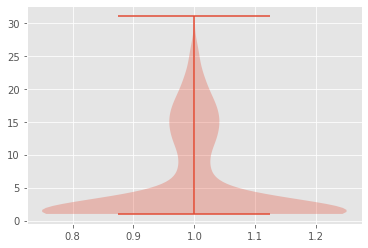

In [23]:
plt.violinplot(df_top_grid['positionOrder'])


<Figure size 1440x720 with 0 Axes>

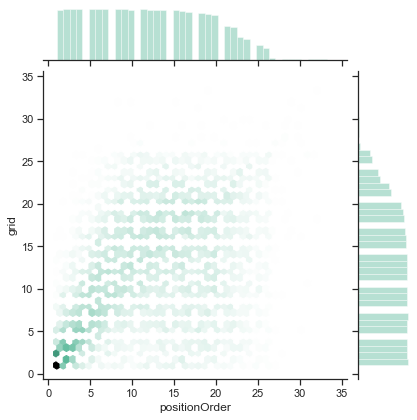

In [24]:
plt.figure(figsize=(20,10))
# plt.scatter(df_results['positionOrder'], df_results['grid'])
# plt.boxplot([df_not_top['positionOrder']], [df_not_top['grid']])
sns.set(style="ticks")


x = df_results['positionOrder']
y = df_results['grid']

sns.jointplot(x, y, kind="hex", color="#4CB391")

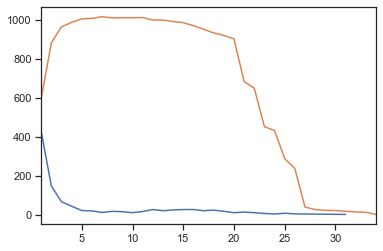

In [25]:
fig, ax = plt.subplots()
finish_count.plot()
not_pole_finish_count.plot()
# Need to analyze how each grid position fares

In [26]:
mask_2 = df_results['grid'] == 2
mask_3 = df_results['grid'] == 3
mask_4 = df_results['grid'] == 4
mask_5 = df_results['grid'] == 5
mask_6 = df_results['grid'] == 6
mask_7 = df_results['grid'] == 7
mask_8 = df_results['grid'] == 8
mask_9 = df_results['grid'] == 9
mask_10 = df_results['grid'] == 10


In [27]:
grid_2 = df_not_top[mask_2]
grid_2 = grid_2['positionOrder'].value_counts().sort_index()
grid_3 = df_not_top[mask_3]
grid_3 = grid_3['positionOrder'].value_counts().sort_index()
grid_4 = df_not_top[mask_4]
grid_4 = grid_4['positionOrder'].value_counts().sort_index()
grid_5 = df_not_top[mask_5]
grid_5 = grid_5['positionOrder'].value_counts().sort_index()
grid_6 = df_not_top[mask_6]
grid_6 = grid_6['positionOrder'].value_counts().sort_index()
grid_7 = df_not_top[mask_7]
grid_7 = grid_7['positionOrder'].value_counts().sort_index()
grid_8 = df_not_top[mask_8]
grid_8 = grid_8['positionOrder'].value_counts().sort_index()
grid_9 = df_not_top[mask_9]
grid_9 = grid_9['positionOrder'].value_counts().sort_index()
grid_10 = df_not_top[mask_10]
grid_10 = grid_10['positionOrder'].value_counts().sort_index()

/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/Charles/anaconda3/lib/python3.7/site-packag

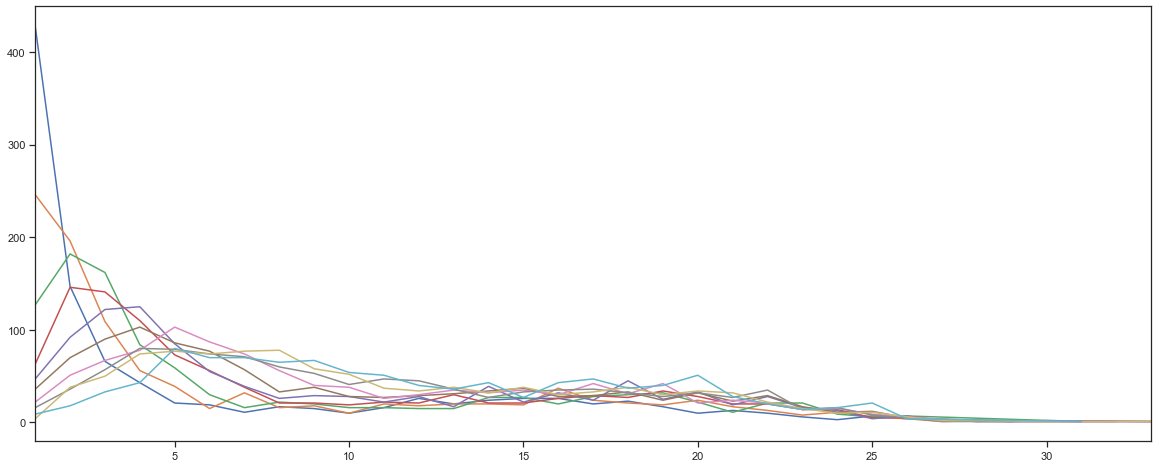

In [28]:
# fig, ax = plt.subplots()
plt.figure(figsize=(20,8))
finish_count.plot()
grid_2.plot()
grid_3.plot()
grid_4.plot()
grid_5.plot()
grid_6.plot()
grid_7.plot()
grid_8.plot()
grid_9.plot()
grid_10.plot();

#waterfall
#pearson
#spearman ** 
#p-value 
#take out a random sample of race results, do spearman correlation test, return p-value, 
#then take spearman of entire population, take a sample of a small size, bigger size
#investigation of the test
#confidence interval for sample correlation



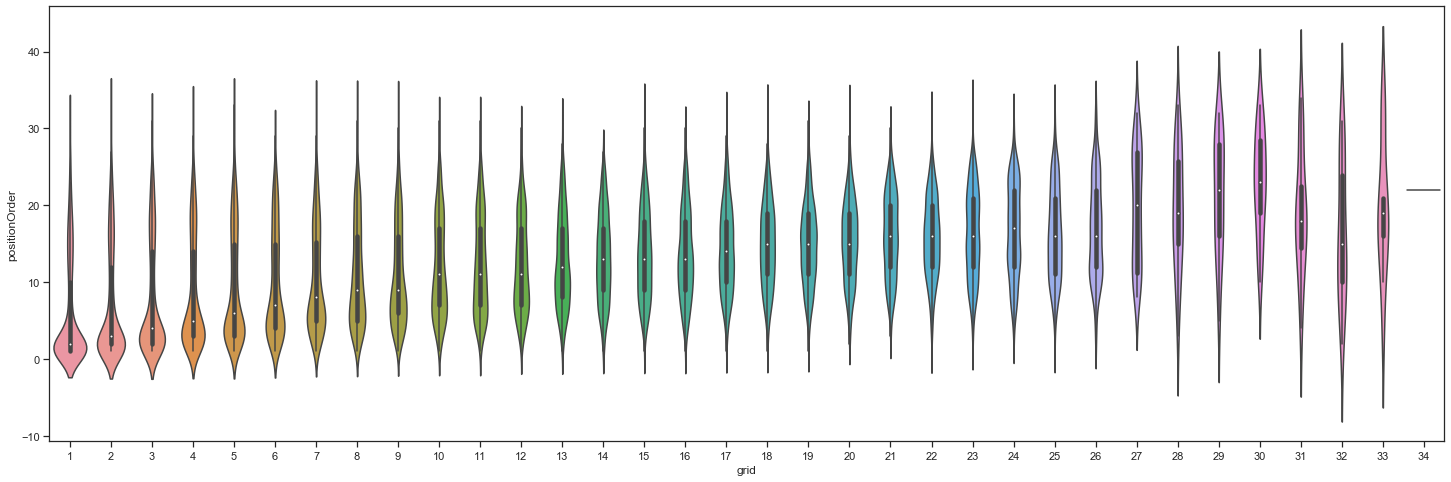

In [29]:
plt.figure(figsize=(25,8))
sns.violinplot(x="grid", y="positionOrder", data=df_results);
plt.savefig('../images/vioplot.png')

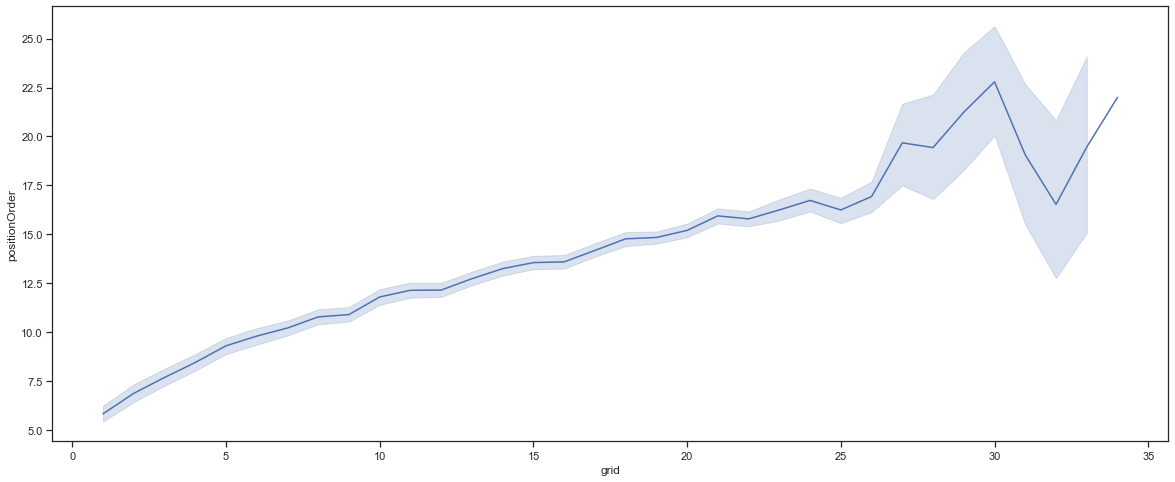

In [30]:
plt.figure(figsize=(20,8))
sns.lineplot(x="grid", y="positionOrder", data=df_results);


In [ ]:
df_rank = df_results
